In [1]:
# Imports.
import sys
sys.path.append(r'C:\Users\edova\Documents\GitLab\ctrappy')
import ctrappy.gui_figures
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open file.
fig_data_path = 'data/figure_data.yaml'
with open(fig_data_path) as file:
    fig_data = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
# Show figure data present in file.
list(fig_data.keys())

['bleaching traces',
 'diffusion (micron)',
 'diffusion (kbp)',
 'diffusion fit (micron)',
 'diffusion fit (kbp)',
 'lifetime (frame)',
 'lifetime (s)',
 'location hist (kbp)',
 'location hist (micron)',
 'location hist from center (kbp)',
 'location traces (kbp)',
 'location traces (micron)',
 'spots per DNA',
 'processivity (bp)',
 'stoichiometry',
 'velocity (kbp/s)']

In [4]:
# Print lifetime data.
lifetime_keys = list(fig_data['lifetime (s)'].keys())
print('All keys:', lifetime_keys)
for key in lifetime_keys:
    val = fig_data['lifetime (s)'][key]
    if isinstance(val, list):
        val = np.array(val)
    print('-----')
    print(key, ':')
    print(val)

All keys: ['t_unit', 'xvals', 'yvals', 'count', 'yfit', 'mean_lifetime']
-----
t_unit :
s
-----
xvals :
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555.
 560. 565. 570. 575. 580. 585. 590. 595. 600. 605. 610. 615. 620. 625.]
-----
yvals :
[1.         1.         0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.81818182 0.81818182 0.81818182 0.81818182
 0.72727273 0.72727273 0.54545455 0.54545455 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454

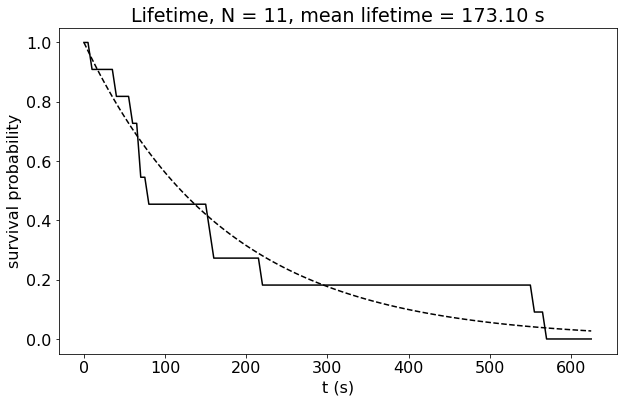

In [5]:
# Use standard lifetime plot.
fig = ctrappy.gui_figures.plot_lifetime(fig_data['lifetime (s)'])
fig

In [9]:
# Define custom lifetime plot.
# Based on ctrappy.gui_figures.plot_lifetime().
def plot_lifetime_custom(data, color, xlim, ylim):

    # Make fig.
    fig = plt.figure(figsize=(8, 6))
    plt.plot(data['xvals'], data['yvals'], color=color, linewidth=2, label='data')
    plt.plot(data['xvals'], data['yfit'], color=color, linestyle='dotted', label='fit')
    plt.title("Green fluorophore lifetime")
    plt.xlabel('t (' + data['t_unit'] + ')')
    plt.ylabel('survival probability')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.text(0.4 * xlim[1], 0.54 * ylim[1], 'N = ' + str(data['count']))
    plt.text(0.4 * xlim[1], 0.46 * ylim[1], "mean lifetime = %.2f " % data['mean_lifetime'] + data['t_unit'])
    plt.legend()
    plt.tight_layout()
    plt.close()

    return fig

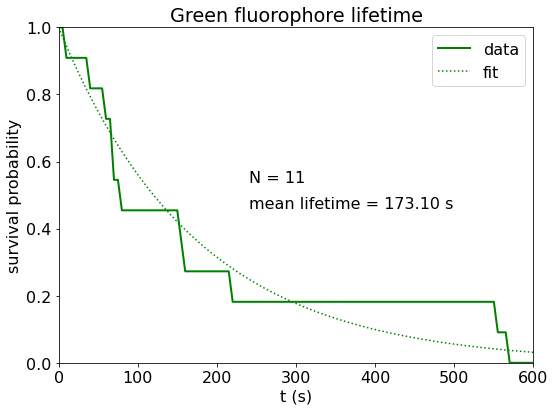

In [21]:
# Show plot.
fig = plot_lifetime_custom(fig_data['lifetime (s)'], 'g', (0, 600), (0, 1))
fig

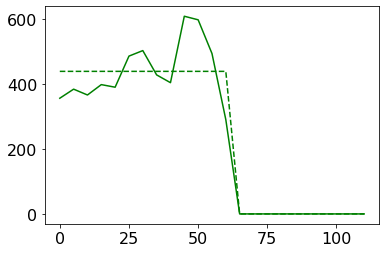

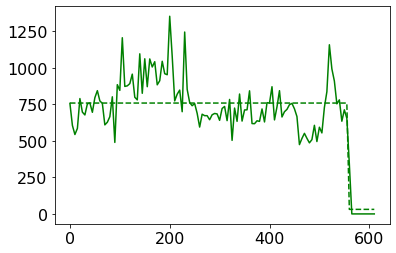

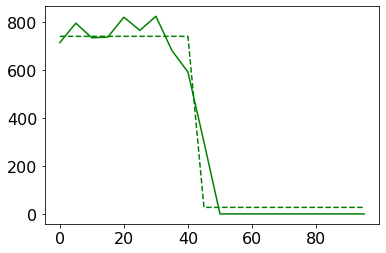

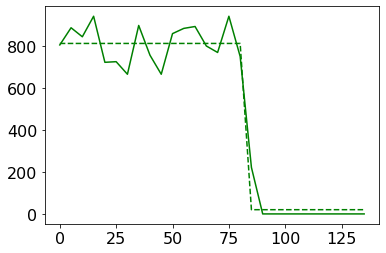

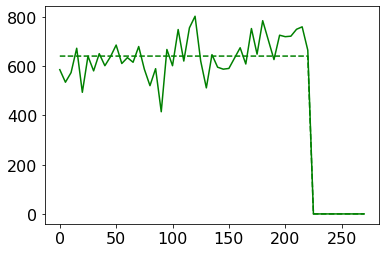

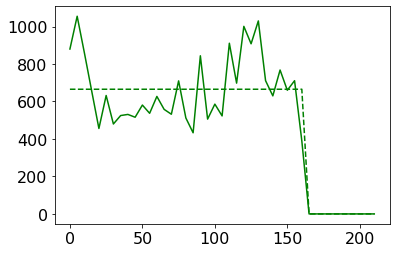

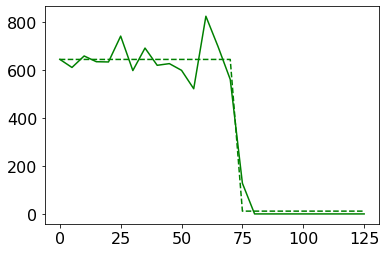

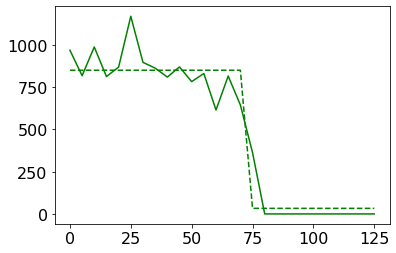

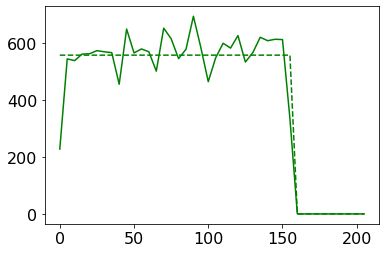

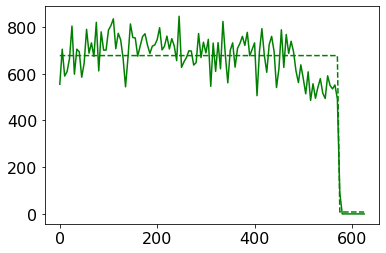

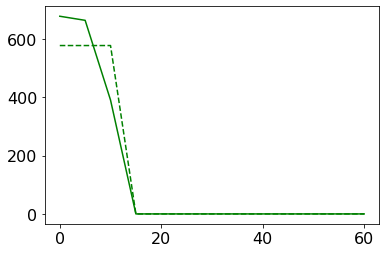

In [18]:
# Custom bleaching trace plots.
for i, trace in fig_data['bleaching traces']['traces'].items():
    plt.plot(trace['t'], trace['intensity'], c=trace['color'])
    plt.plot(trace['t'], trace['fit'], c=trace['color'], linestyle='dashed')
    plt.show()